<a href="https://colab.research.google.com/github/santiagofloresm/ENEL645-Team25-FinalProject/blob/jj-cnn/FinalProject-Phase2_Import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
## Team 25
Santiago Flores - 30119885

Davis Allan - 10016543

Jordan Joorisity - 30117950

Patrick Pickard - 30116807

Joshua Posyluzny - 30118206

# 1. Loading and pre-processing the dataset

### 1.1 Clone the repository

In [1]:
!git clone -b dev https://github.com/santiagofloresm/ENEL645-Team25-FinalProject.git

Cloning into 'ENEL645-Team25-FinalProject'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 156878 (delta 5), reused 11 (delta 3), pack-reused 156860
Receiving objects: 100% (156878/156878), 2.85 GiB | 40.32 MiB/s, done.
Resolving deltas: 100% (196/196), done.
Checking out files: 100% (168575/168575), done.


### 1.2 Define the paths

In [2]:
train_folder = 'ENEL645-Team25-FinalProject/New_Dataset/Train'
test_alternative_folder = 'ENEL645-Team25-FinalProject/New_Dataset/Alternative_Test'

### 1.3 Data display

There are 29 classes in the dataset, one for each letter in the English alphabet, one for space, one for delete and a blank one. Below is an exmaple of each one

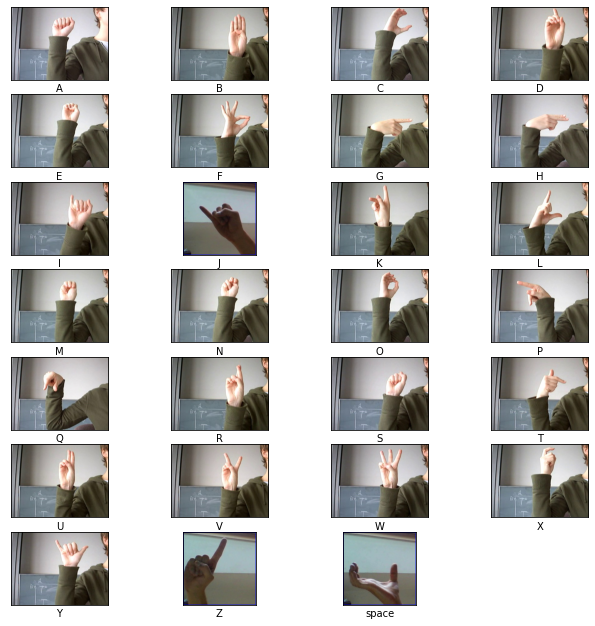

In [3]:
import matplotlib.pyplot as plt

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'space']

plt.figure(figsize=(11,11))
for i in range (0,27):
  plt.subplot(7,4, i+1)
  plt.xticks([])
  plt.yticks([])
  path = train_folder + "/" + classes[i] + "/" + classes[i] + "2.jpg"
  img = plt.imread(path)
  plt.imshow(img)
  plt.xlabel(classes[i])

### 1.5 Data import and augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator

image_input_dimensions_3d = (128,128,3)
image_input_dimensions_2d = (128,128)
batch_size = 32
seed = 32

#### 1.5.1 Training data

In [5]:
# https://keras.io/api/preprocessing/image/
# categorical class_mode will be 2D one-hot encoded labels
# The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices
train_data_gen = ImageDataGenerator(brightness_range=[0.5, 1.5], 
                                    rotation_range=20,
                                    horizontal_flip=True, 
                                    rescale=1./255,
                                    validation_split=0.10)

train_generator = train_data_gen.flow_from_directory(train_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d, 
                                                     class_mode="categorical",
                                                     subset="training")

Found 71915 images belonging to 27 classes.


In [6]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'space': 26}

### Training image analysis

In [7]:
  h, w, r = train_generator.image_shape
  print('There are', train_generator.samples, 'images for training the model')
  print("Approximately {:.0f} images per category".format(train_generator.samples/train_generator.num_classes))
  print('The shape of each image is', train_generator.image_shape)
  print('From which:')
  print('The width is', w)
  print('The height is', h)
  print('And each pixel has a value for each component of RGB for a total of', r)

There are 71915 images for training the model
Approximately 2664 images per category
The shape of each image is (128, 128, 3)
From which:
The width is 128
The height is 128
And each pixel has a value for each component of RGB for a total of 3


#### 1.5.2 Validation data

In [8]:
# this will simply scale the validation image set the same way as the test and train is done, encode the data to 'categorical' (one_hot_encoder equivalent) and store it in an identical object type
val_generator = train_data_gen.flow_from_directory(train_folder, 
                                                 batch_size=batch_size, 
                                                 seed=seed, 
                                                 target_size=image_input_dimensions_2d, 
                                                 class_mode="categorical",
                                                 subset="validation")

Found 7975 images belonging to 27 classes.


In [19]:
  h, w, r = val_generator.image_shape
  print('There are', val_generator.samples, 'images for training the model')
  print("Approximately {:.0f} images per category".format(val_generator.samples/val_generator.num_classes))
  print('The shape of each image is', val_generator.image_shape)
  print('From which:')
  print('The width is', w)
  print('The height is', h)
  print('And each pixel has a value for each component of RGB for a total of', r)

There are 7975 images for training the model
Approximately 295 images per category
The shape of each image is (128, 128, 3)
From which:
The width is 128
The height is 128
And each pixel has a value for each component of RGB for a total of 3


#### 1.5.3 Alternative Test data

In [10]:
alternative_test_data_gen = ImageDataGenerator(rescale=1./255)

alternative_test_generator = alternative_test_data_gen.flow_from_directory(test_alternative_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical")

Found 810 images belonging to 27 classes.


### 1.6 Train test split

In [11]:
print('After the split there are:')
print(train_generator.samples, 'images on the train split')
print(val_generator.samples, 'images on the validation split')
print(alternative_test_generator.samples, 'images on the alternative test split')
print('For each category 90% of the images are in the train split and 10% in the validation split')

After the split there are:
71915 images on the train split
7975 images on the validation split
810 images on the alternative test split
For each category 90% of the images are in the train split and 10% in the validation split


### 2.2 Model Definition

In [14]:
import tensorflow as tf

In [20]:
def cnn_asl_model(ishape = image_input_dimensions_3d, k = 27, lr = 1e-4):

  model_input = tf.keras.layers.Input(shape = ishape)

  l1 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(model_input)
  l1_1 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(l1)
  l1_maxpool = tf.keras.layers.MaxPool2D((2,2))(l1_1)

  l2 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l1_maxpool)
  l2_1 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l2)
  l2_maxpool = tf.keras.layers.MaxPool2D((2,2))(l2_1)

  l3 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l2_maxpool)
  l3_1 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l3)
  l3_maxpool = tf.keras.layers.MaxPool2D((2,2))(l3_1)

  l4 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu')(l3_maxpool)
  l4_1 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu')(l4)
  l4_maxpool = tf.keras.layers.MaxPool2D((2,2))(l4_1)

  flat = tf.keras.layers.Flatten()(l4_maxpool)
  flat_drop = tf.keras.layers.Dropout(0.5)(flat)
  out = tf.keras.layers.Dense(k, activation = 'softmax')(flat_drop)

  model = tf.keras.models.Model(inputs = model_input, outputs = out)
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

### 2.3 Model Summary

In [21]:
model = cnn_asl_model()
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0   

### 2.4 Model Callbacks

In [22]:
model_name = "best_model_asl_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor = 'val_loss', verbose = 0, save_best_only = True, save_weights_only = True, mode = 'min')

def scheduler(epoch, lr):
  if epoch%10 == 0:
    lr = lr/2
  return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

### 2.5 Model training

In [23]:
# fit the model on the augmented dataset
history = model.fit(train_generator, steps_per_epoch=71915/batch_size, 
          epochs = 100 , verbose = 1, 
          callbacks = [early_stop, monitor, lr_schedule], 
          validation_data=val_generator, validation_steps=7975/batch_size)

Epoch 1/100
2247/2247 [==============================] - 421s 187ms/step - loss: 2.1640 - accuracy: 0.3455 - val_loss: 4.7463 - val_accuracy: 0.2724
Epoch 2/100
2247/2247 [==============================] - 406s 181ms/step - loss: 0.7535 - accuracy: 0.7629 - val_loss: 4.8677 - val_accuracy: 0.3190
Epoch 3/100
1018/2247 [============>.................] - ETA: 3:19 - loss: 0.4589 - accuracy: 0.8602

KeyboardInterrupt: ignored

Saving model training history

In [ ]:
import numpy as np

# saving training history to a numpy file
np.save('model_history.npy',history.history)

Loading model training history

In [ ]:
# loading the training history from numpy file, only need to run if we have to access history again
training_history = np.load('/content/ENEL645-Team25-FinalProject/Model Training History/model_history.npy',allow_pickle='TRUE').item()

# 3 Testing the model and extracting relevant metrics

In [ ]:
# TODO: update file path of best model weights

# best_model_weights_path = "/content/ENEL645-Team25-FinalProject/Best Model Weights/best_model_asl_cnn.h5"

### 3.1 Accuracy and training history plots

In [ ]:
# TODO: update model weights file path variable

# model.load_weights(best_model_weights_path)
metrics = model.evaluate(alternative_test_generator)
print("This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.")
print("Categorical cross-entropy:", round(metrics[0], 3))
print("Accuracy:", round(metrics[1]*100, 2),'%')

In [ ]:
loss = model.evaluate(alternative_test_generator, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()

plt.plot(training_history['loss'], label = "Train loss")
plt.plot(training_history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(training_history['accuracy'], label = "Train accuarcy")
plt.plot(training_history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### 3.2 Classification Report & Confusion Matrix

#### 3.2.1 Function definitions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import itertools

In [ ]:
# code was acquired from https://www.kaggle.com/danrasband/classifying-images-of-the-asl-alphabet-using-keras

def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


def plot_confusion_matrix_with_default_options(y_pred, y_true, classes):
    '''Plot a confusion matrix heatmap with a default size and default options.'''
    cm = confusion_matrix(y_true, y_pred)
    with sns.axes_style('ticks'):
        plt.figure(figsize=(12, 12))
        plot_confusion_matrix(cm, classes)
        plt.show()
    return

#### 3.2.2 Resetting the test generators and setting shuffle to False

In [ ]:
alternative_test_generator.reset()
alternative_test_generator = test_data_gen.flow_from_directory(test_alternative_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical",
                                                   shuffle=False)

Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


Classification report and confusion matrix for alternate test data

In [ ]:
predictions_alternate_test = model.predict(alternative_test_generator)
y_pred_alternate = np.argmax(predictions_alternate_test, axis=1)
y_true_alternate = alternative_test_generator.classes

report_alternate = classification_report(y_true_alternate, y_pred_alternate, target_names=class_labels)
print(report_alternate)

In [ ]:
plot_confusion_matrix_with_default_options(y_pred_alternate, y_true_alternate, class_labels)